In [ ]:
#Edgar Moises Hernandez-Gonzalez
#07/07/19-08/07/19
#CNN para EEG de Habla Imaginada con 2 capas
#32@3x7 y 64@3x7

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [2]:
datos = pd.read_csv("Submuestreo01.csv", header=None)
x = datos.iloc[:, 0:3072].values
y = datos.iloc[:, 3072].values

num_classes = 6
n_samples = len(y)
print(x.shape)
print(y.shape)
print(n_samples)

(132, 3072)
(132,)
132


In [3]:
#escalar los datos para que tengan media = 0 y desviacion estandar = 1
scaler = StandardScaler().fit(x)
x = scaler.transform(x)

In [4]:
#convertir de 2D a 4D
x = x.reshape((n_samples, 12, 256, 1))
print(x.shape)

(132, 12, 256, 1)


In [5]:
#dividir en train y test
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 7), activation='relu', input_shape=(12, 256, 1)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 7), activation='relu'))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(num_classes, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 10, 250, 32)       704       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 5, 125, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 3, 119, 64)        43072     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 1, 59, 64)         0         
_________________________________________________________________
flatten (Flatten)            (None, 3776)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                241728    
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
__________

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(x_train, y_train, epochs = 20, batch_size = 99, validation_data=(x_test, y_test))

Train on 99 samples, validate on 33 samples
Epoch 1/20
99/99 [==============================] - 4s 42ms/sample - loss: 1.8404 - acc: 0.1010 - val_loss: 2.1064 - val_acc: 0.1515
Epoch 2/20
99/99 [==============================] - 0s 611us/sample - loss: 1.8424 - acc: 0.2121 - val_loss: 1.9335 - val_acc: 0.2424
Epoch 3/20
99/99 [==============================] - 0s 556us/sample - loss: 1.7411 - acc: 0.2727 - val_loss: 1.8743 - val_acc: 0.1818
Epoch 4/20
99/99 [==============================] - 0s 594us/sample - loss: 1.7170 - acc: 0.2626 - val_loss: 1.8327 - val_acc: 0.1818
Epoch 5/20
99/99 [==============================] - 0s 644us/sample - loss: 1.6623 - acc: 0.2727 - val_loss: 1.8155 - val_acc: 0.1818
Epoch 6/20
99/99 [==============================] - 0s 773us/sample - loss: 1.6240 - acc: 0.4242 - val_loss: 1.8149 - val_acc: 0.2424
Epoch 7/20
99/99 [==============================] - 0s 758us/sample - loss: 1.5899 - acc: 0.4242 - val_loss: 1.8474 - val_acc: 0.2121
Epoch 8/20
99/99 [=

In [10]:
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

33/33 [==============================] - 0s 7ms/sample - loss: 2.6461 - acc: 0.2727
Test loss: 2.646147865237612
Test accuracy: 0.27272728


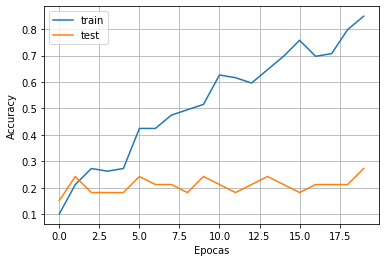

In [11]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.grid()
plt.xlabel('Epocas')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'])
plt.show()

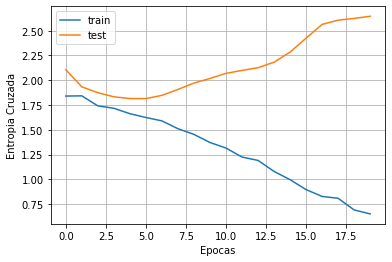

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.xlabel('Epocas')
plt.ylabel('Entropia Cruzada')
plt.legend(['train', 'test'])
plt.show()